<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/MK_ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import numpy as np


##Regression

In [3]:
## check dataset
california_housing = fetch_california_housing()

In [4]:
## split data
X_train0, X_test, y_train0,  y_test = train_test_split(california_housing["data"],
                                                    california_housing["target"])

In [5]:
## split train to train and validation
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [6]:
## check shape of train and test
print(X_train1.shape)
print(X_test.shape)
print(X_validation.shape)

(11610, 8)
(5160, 8)
(3870, 8)


In [7]:
## Standardization
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

Create Model

In [8]:
## create Model
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)]
)

In [9]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [10]:
history = model.fit(X_train_s, y_train1, epochs=30, validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 6s 9ms/step - loss: 0.8136 - mean_absolute_error: 0.5991 - val_loss: 0.5003 - val_mean_absolute_error: 0.5225
Epoch 2/30
363/363 [==============================] - 3s 8ms/step - loss: 0.5305 - mean_absolute_error: 0.5056 - val_loss: 0.4524 - val_mean_absolute_error: 0.4907
Epoch 3/30
363/363 [==============================] - 3s 7ms/step - loss: 0.4519 - mean_absolute_error: 0.4778 - val_loss: 0.4440 - val_mean_absolute_error: 0.4962
Epoch 4/30
363/363 [==============================] - 2s 7ms/step - loss: 0.4297 - mean_absolute_error: 0.4653 - val_loss: 0.4230 - val_mean_absolute_error: 0.4573
Epoch 5/30
363/363 [==============================] - 4s 10ms/step - loss: 0.4183 - mean_absolute_error: 0.4585 - val_loss: 0.4039 - val_mean_absolute_error: 0.4585
Epoch 6/30
363/363 [==============================] - 3s 8ms/step - loss: 0.4078 - mean_absolute_error: 0.4524 - val_loss: 0.3939 - val_mean_absolute_error: 0.4503
Epoch 7/30
363/

## Functional API

In [11]:
X_train0.shape[1:]

(8,)

In [12]:
input_layer = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
cancatenate_layer = keras.layers.Concatenate()([input_layer, hidden_layer_2])
output_layer = keras.layers.Dense(1)(cancatenate_layer)
model_conc = keras.Model(inputs=[input_layer], outputs=[output_layer])


In [13]:
model_conc.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 50)                   450       ['input_1[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 10)                   510       ['dense_3[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 18)                   0         ['input_1[0][0]',             
                                                                     'dense_4[0][0]']         

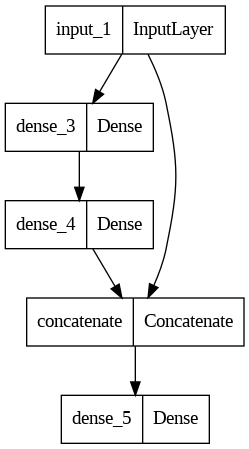

In [14]:
keras.utils.plot_model(model_conc, "model_pic.png")

In [15]:
model_conc.compile(loss="mean_squared_error",
                   optimizer="sgd",
                   metrics="mean_absolute_error")

In [16]:
model_conc.fit(X_train_s, y_train1, epochs = 30,
               validation_data = (X_validation_s, y_validation) )

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 1.5930 - mean_absolute_error: 0.6698 - val_loss: 0.5787 - val_mean_absolute_error: 0.5665
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: na

## funcitonal API with multiple input

In [17]:
X_train_s_1, X_train_s_2 = X_train_s[: , :6], X_train_s[: , -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[: , :6], X_validation_s[: , -4:]
X_test_s_1, X_test_s_2 = X_test_s[: , :6], X_test_s[: , -4:]

In [18]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1)(concatenation_layer)
model_multiple = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer])

In [19]:
model_multiple.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 50)                   350       ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 10)                   510       ['dense_6[0][0]']             
                                                                                            

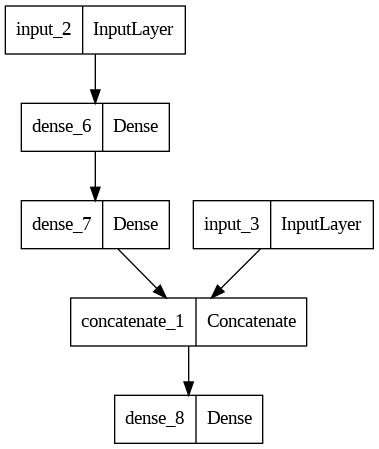

In [20]:
keras.utils.plot_model(model_multiple, "multiple_model.png")

In [21]:
model_multiple.compile(loss="mean_squared_error",
                       optimizer="sgd",
                       metrics="mean_absolute_error")

In [22]:
model_multiple.fit((X_train_s_1, X_train_s_2), y_train1, epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), y_validation))

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.1537 - mean_absolute_error: 0.6253 - val_loss: 0.5387 - val_mean_absolute_error: 0.5448
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5119 - mean_absolute_error: 0.5213 - val_loss: 0.4808 - val_mean_absolute_error: 0.5140
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4741 - mean_absolute_error: 0.4995 - val_loss: 0.4478 - val_mean_absolute_error: 0.4904
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4513 - mean_absolute_error: 0.4868 - val_loss: 0.4381 - val_mean_absolute_error: 0.4756
Epoch 5/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4507 - mean_absolute_error: 0.4818 - val_loss: 0.4316 - val_mean_absolute_error: 0.4756
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4296 - mean_absolute_error: 0.4705 - val_loss: 0.4162 - val_mean_absolute_error: 0.4802
Epoch 7/30
363/3

## with multiple output

In [23]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1, name="output_layer")(concatenation_layer)
helper_output = keras.layers.Dense(1,name = "helper_output")(hidden_layer_2)
model_multiple_output = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer, helper_output])

In [24]:
model_multiple_output.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 50)                   350       ['input_4[0][0]']             
                                                                                                  
 input_5 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 10)                   510       ['dense_9[0][0]']             
                                                                                            

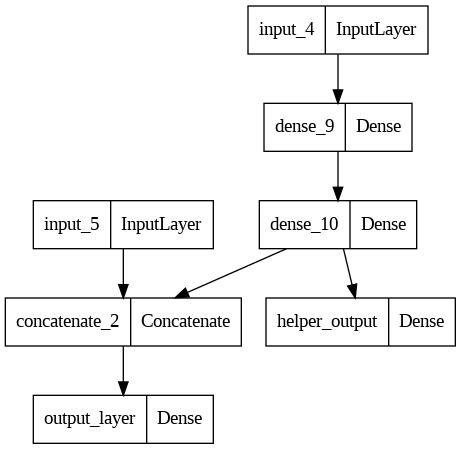

In [25]:
keras.utils.plot_model(model_multiple_output, "multiple_model.png")

In [26]:
model_multiple_output.compile(loss=["mse", "mse"],
                              loss_weights = [0.8, 0.2],
                              optimizer="sgd",
                              metrics=["mae"])

In [27]:
model_multiple_output.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), (y_validation,y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 5ms/step - loss: 1.3971 - output_layer_loss: 1.4771 - helper_output_loss: 1.0773 - output_layer_mae: 0.6570 - helper_output_mae: 0.7306 - val_loss: 0.5875 - val_output_layer_loss: 0.5742 - val_helper_output_loss: 0.6410 - val_output_layer_mae: 0.5561 - val_helper_output_mae: 0.5931
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5608 - output_layer_loss: 0.5447 - helper_output_loss: 0.6250 - output_layer_mae: 0.5354 - helper_output_mae: 0.5819 - val_loss: 0.5218 - val_output_layer_loss: 0.5040 - val_helper_output_loss: 0.5931 - val_output_layer_mae: 0.5355 - val_helper_output_mae: 0.5831
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5614 - output_layer_loss: 0.5533 - helper_output_loss: 0.5940 - output_layer_mae: 0.5154 - helper_output_mae: 0.5626 - val_loss: 0.4949 - val_output_layer_loss: 0.4772 - val_helper_output_loss: 0.5657 - val_output_layer_mae: 0.5187 - val_helper

## Subclass Model

In [28]:
class WideAndDeepAnn(keras.Model):
  def __init__(self, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden_layer1 = keras.layers.Dense(50, activation = activation)
    self.hidden_layer2 = keras.layers.Dense(10, activation = activation)
    self.final_output = keras.layers.Dense(1)
    self.helper_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_1, input_2 = inputs
    h1_out = self.hidden_layer1(input_1)
    h2_out = self.hidden_layer2(h1_out)
    concat_out = keras.layers.concatenate([input_1, h2_out])
    final_output = self.final_output(concat_out)
    helper_output = self.helper_output(h2_out)
    return final_output, helper_output



In [29]:
subclass_model = WideAndDeepAnn()

In [30]:
subclass_model.compile(loss=["mse", "mse"],
                              loss_weights = [0.8, 0.2],
                              optimizer="sgd",
                              metrics=["mae"])

In [31]:
subclass_model.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), (y_validation,y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 0.9549 - output_1_loss: 0.9429 - output_2_loss: 1.0030 - output_1_mae: 0.6790 - output_2_mae: 0.6851 - val_loss: 0.6096 - val_output_1_loss: 0.5990 - val_output_2_loss: 0.6520 - val_output_1_mae: 0.5801 - val_output_2_mae: 0.5971
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6224 - output_1_loss: 0.6167 - output_2_loss: 0.6453 - output_1_mae: 0.5641 - output_2_mae: 0.5868 - val_loss: 0.5731 - val_output_1_loss: 0.5667 - val_output_2_loss: 0.5984 - val_output_1_mae: 0.5666 - val_output_2_mae: 0.5744
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5881 - output_1_loss: 0.5850 - output_2_loss: 0.6005 - output_1_mae: 0.5480 - output_2_mae: 0.5662 - val_loss: 0.5410 - val_output_1_loss: 0.5355 - val_output_2_loss: 0.5633 - val_output_1_mae: 0.5475 - val_output_2_mae: 0.5561
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5438 - outpu

## saving Models

In [32]:
model.save("model_regression.h5")
model_conc.save("model_conc_regression.h5")
model_multiple.save("model_multiple_regressin.h5")
model_multiple_output.save("model_multiple_output_regression.h5")
subclass_model.save_weights("model_subclass_regression.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
model_from = keras.models.load_model("model_regression.h5")

In [35]:
model_from.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 971 (3.79 KB)
Trainable params: 971 (3.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
